# Lecture 5 & 6: Pytorch and Supervised Learning

## Main Learning Outcomes
- Understanding pytorch/numpy representation and manipulating of higher-dimensional data.
- A mathematical primer to supervised learning.
- Multi-layer perceptron linear algebra computation.
- Pytorch Autograd.

## Pytorch Tensors
- <font color='DarkGoldenRod'>Storage</font> of tensors (ndarrays) is always linear and contiguous.
- Broadcast: manipulating the <font color='DarkGoldenRod'>stride</font> of the argument tensors, so operations can be done.

# Generate Our Data points

In [121]:
from random import Random
from math import sqrt
from math import ceil
from time import monotonic

SEED = 10
rand_gen=Random(SEED)
# initalizing with seed to get the same sequence of numbers at every time we run the cell
def generate_data(N=1000):
    vecx,vecy=[],[]
    for _ in range(N):
        vecx.append(rand_gen.uniform(a=0,b=1))
        vecy.append(rand_gen.uniform(a=0,b=1))
    return vecx,vecy

def loss(x_p,y_p,batchx,batchy):
      return (1/len(batchx)*
      sum([sqrt((x_i-x_p)**2+(y_i-y_p)**2) for x_i,y_i in zip(batchx,batchy)]))
      


datax,datay=generate_data()

step=0.01
Mesh_size=300
# so why 300? observe that domain[-1,2] >> the len = 3 , step is 0.01 so for each 1 cell we need 100 meshes to process (100*0.01=1), finally Mesh_Size =  3*100=300 meshes
x_mesh = [-1+ i*step for i in range(Mesh_size)]
y_mesh = [-1+ i*step for i in range(Mesh_size)]
start = monotonic()
loss_mesh = [ 
    [loss(x_cur,y_cur,datax,datay) for x_cur in x_mesh] for y_cur in y_mesh
]
print(f" Time = {(monotonic() - start)*1000:0.2f} ms")  # 0.2f formatting output to be a float with 2 decimals

 Time = 38010.56 ms


----------

--------------------

# Pytorch Terminologies

In PyTorch, tensors are objects that represent multi-dimensional arrays and are similar to numpy arrays. However, PyTorch tensors are designed to work with GPUs, allowing for high-speed parallel computation. Additionally, PyTorch has automatic differentiation capabilities that can be used to calculate gradients of loss functions, which are essential for training neural networks.

In [122]:
import torch
data_torch = torch.tensor([datax,datay])
# You can get the tensor's shape
print(f"data_torch shape  {data_torch.shape }")
# tensor is a list of lists more accurately list of pointers or refrences 
print(f"ptr for data_torch {data_torch.storage().data_ptr() } ")

# Stride is the shift for a certain dimension to go to the next item, it is the way pytorch really mainpulate the N-dim arrays
print(f"Stride before Transpose { data_torch.stride(0) },{data_torch.stride(1)}")
data_torch = data_torch.t()
# After Transposing we observe:
print(f"data_torch shape  {data_torch.shape }")
print(f"Stride After Transpose { data_torch.stride(0) },{data_torch.stride(1)}")
print(f"ptr for data_torch  After Transpose {data_torch.storage().data_ptr() } ")

# broadcasting
data_torch = data_torch.broadcast_to(size=(100,1000,2))
# After broadcasting
print(f"data_torch shape After broadcasting  {data_torch.shape }")
print(f"Stride After Transpose { data_torch.stride(0) } , {data_torch.stride(1)} , {data_torch.stride(2)}")
# stride of dim zero equals zero which means the same data and no change occur while transitioning 
# so its like a fake view for my data or converting my data to a higher dimension just like interstellar film representing time-space as a 4th dim with time physically

data_torch shape  torch.Size([2, 1000])
ptr for data_torch 180732352 
Stride before Transpose 1000,1
data_torch shape  torch.Size([1000, 2])
Stride After Transpose 1,1000
ptr for data_torch  After Transpose 180732352 
data_torch shape After broadcasting  torch.Size([100, 1000, 2])
Stride After Transpose 0 , 1 , 1000


-----------------

------------------


# Calcualting loss with vanilla python (standard)

In [123]:
x_p,y_p=5,5
old_loss = loss(x_p,y_p,datax,datay)
print(old_loss)

6.366434735715472


# Calculating loss function using tensors from pytorch 

In [124]:
import torch
data_torch = torch.tensor([datax,datay])
data_torch = data_torch.t()
# print(data_torch.shape) # [1000,2]
pnt = torch.tensor([5.,5.])
# print(pnt.shape)  #[2]
res = data_torch - pnt  # pnt dim was 2 but broadcast occured as dim(1) is the same and dim(0) of pnt doesn't exist 
res = res**2
res = res.sum(dim = 1)
# print(res.shape) # [1000]
res = torch.sqrt(res)
# print(res.shape) # [1000]
res = res.sum(dim = 0)/data_torch.shape[0]
print(res)

tensor(6.3664)


we got the same answer but in smaller time why ?????


Calculating loss function using tensors from PyTorch is faster than vanilla Python or using standard Python 

because PyTorch uses highly optimized C++ backend for numerical computations, including matrix operations and other mathematical operations. These operations are executed on GPUs or CPUs using parallel processing, which makes PyTorch much faster compared to traditional Python.


The performance gains of PyTorch over vanilla Python or standard Python are due to the use of optimized numerical libraries and parallel processing, making it more efficient for scientific computing and machine learning applications. Therefore, when working with large amounts of data and complex mathematical operations, PyTorch can provide significant performance improvements over traditional Python.

---------

-----

# Get familiar with Lampda function

In [125]:
import torch
# Define a lambda function for the loss function using PyTorch operations
torch_loss_fn = lambda pnt, data:torch.sqrt(((pnt-data)**2).sum(dim=1)).sum(dim = 0) / data.shape[0]

# Create a tensor from the data and transpose it
torch_data = torch.tensor([datax,datay]).t()
# Set the step size and mesh size
step=0.01
Mesh_size=300
# so why 300? observe that domain[-1,2] >> the len = 3 , step is 0.01 so for each 1 cell we need 100 meshes to process (100*0.01=1), finally Mesh_Size =  3*100=300 meshes

# Create a list of x and y mesh points
x_mesh = [-1+ i*step for i in range(Mesh_size)]
y_mesh = [-1+ i*step for i in range(Mesh_size)]
# Get the current time
start_time = monotonic()
# Compute the loss for each point in the mesh
loss_mesh = [ 
    [ torch_loss_fn(torch.tensor([x_cur,y_cur]),torch_data) for x_cur in x_mesh] for y_cur in y_mesh
]
# Print the time taken to compute the loss for the mesh
print(f" Time = {(monotonic() - start_time)*1000:0.2f} ms")  # 0.2f formatting output to be a float with 2 decimals

 Time = 4318.51 ms


--------------------

you don't need to be familiar with this 
but understand the outline
we can optimize in time by creating our meshes with broadcasting and some tricks to avoid using loops

In [126]:
# further speed comparison
torch_loss_fn_faster = lambda pnt, data:torch.sqrt(((pnt-\
                                            data.repeat((pnt.shape[0],1,1)).view(-1, pnt.shape[0], 2))\
                                            **2).\
                                            sum(dim=1)).sum(dim = 0) / data.shape[0]


# Convert input data to a PyTorch tensor 
torch_data = torch.tensor([datax,datay]).t()
# Create two tensors (x_0 and x_1) to represent a grid of points
x_0 = torch.linspace(-1,2,300).repeat(1,300).t()     
x_1 = torch.linspace(-1,2,300).repeat(300,1).t().reshape(-1,1)
# Stack the two tensors horizontally to create a matrix of 2D points (pnts) 
pnts = torch.hstack((x_0,x_1))

# Record the start time before evaluating the loss function
start_time = monotonic()     
# Evaluate the loss function for the matrix of points (pnts) and the input data (torch_data)
res = torch_loss_fn_faster(pnts,torch_data)

# Calculate the elapsed time and print it to the console
print(f" Time = {(monotonic() - start_time)*1000:0.2f} ms")  # 0.2f formatting output to be a float with 2 decimals

 Time = 2514.66 ms


The optimized thing between the two methods is the second method because it uses broadcasting and tensor reshaping to avoid the nested for-loops used in the first method.

The first method iterates over each point in a mesh grid and calculates the loss function for that point. This results in nested for-loops, which can be slow and inefficient, especially for large data sets.

In the second method, the loss function is calculated for all points in the mesh grid simultaneously using tensor operations. The repeat() function is used to create a tensor with the same shape as pnts but with each data point repeated along a new axis. Then, the view() function is used to reshape the repeated data tensor to have the same shape as pnts, so that they can be used in the loss function. This avoids the need for nested for-loops and results in a significant speedup.

In the first method, we are iterating over each point in the mesh grid using nested for-loops, and then computing the loss function for that point. This means that for each point, we are performing the following operations:

1- Subtracting the point coordinates from the data coordinates.


2- Taking the square of the difference.


3- Summing the squares.


4- Taking the square root.


5- Summing the square roots.


This can be slow and inefficient, especially for large datasets, because Python is an interpreted language and the nested for-loops result in a large number of function calls, which can add significant overhead. Also, the operations are not performed in parallel, so the computation time increases as the number of points in the mesh grid increases.

-------------------

In the second method, we are using tensor operations to compute the loss function for all points in the mesh grid simultaneously. Here's how it works:

1- We create two tensors: x_0 and x_1. x_0 is a tensor that contains a sequence of 300 numbers ranging from -1 to 2, repeated 300 times along the rows. x_1 is a tensor that contains the same sequence of numbers repeated 300 times along the columns, flattened to a one-dimensional tensor.


2- We concatenate x_0 and x_1 along the columns to create a tensor pnts of shape (90000, 2), which contains all the points in the mesh grid.


3- We use broadcasting and tensor reshaping to compute the loss function for all points in the mesh grid simultaneously. Specifically, we use the repeat() function to create a tensor data_repeat of shape (90000, 4),

 which contains each data point repeated 90000 times along a new axis. Then we use the view() function to reshape data_repeat to have the same shape as pnts. This allows us to subtract each point in pnts from each data point, take the square of the difference, and sum the squares, all in one step. Finally, we take the square root of the sum, and take the mean of the square roots to get the loss value.


By using tensor operations, we avoid the nested for-loops used in the first method, and perform all the computations in parallel, which significantly reduces the computation time. In addition, PyTorch uses highly optimized C++ backend for numerical computations, including matrix operations and other mathematical operations, which further speeds up the computation.

------------------------

here we passed our tensors to our GPU 
and obviously it is faster than loops & broadcasting

In [120]:
# further speed comparison
torch_loss_fn_faster = lambda pnt, data:torch.sqrt(((pnt-\
                                            data.repeat((pnt.shape[0],1,1)).view(-1, pnt.shape[0], 2))\
                                            **2).\
                                            sum(dim=1)).sum(dim = 0) / data.shape[0]

# Convert input data to a PyTorch tensor and move it to the GPU
torch_data = torch.tensor([datax,datay]).t().to("cuda:0")
# Create two tensors (x_0 and x_1) to represent a grid of points
x_0 = torch.linspace(-1,2,300).repeat(1,300).t()     
x_1 = torch.linspace(-1,2,300).repeat(300,1).t().reshape(-1,1)
# Stack the two tensors horizontally to create a matrix of 2D points (pnts) and move it to the GPU
pnts = torch.hstack((x_0,x_1)).to("cuda:0")
# Record the start time before evaluating the loss function
start_time = monotonic()     
# Evaluate the loss function for the matrix of points (pnts) and the input data (torch_data)
res = torch_loss_fn_faster(pnts,torch_data)

# Calculate the elapsed time and print it to the console
print(f" Time = {(monotonic() - start_time)*1000:0.2f} ms")  # 0.2f formatting output to be a float with 2 decimals

RuntimeError: ignored

The main difference between method 2 and this method is that this method uses GPU acceleration to perform the calculations. The to("cuda:0") method is used to move the data and calculations to the GPU, which is designed to handle matrix operations much more efficiently than the CPU.

In method 2, the calculations were still performed on the CPU. By using a GPU, the calculations can be performed in parallel, which can provide a significant speedup for certain types of operations, such as matrix multiplication.

However, it's important to note that not all operations can be accelerated on a GPU, and the speedup will depend on the size of the data and the specific operation being performed. Additionally, moving data back and forth between the CPU and GPU can also introduce overhead and affect performance.

--------------

-----------------

-----------------------------

# Lecture 6: Supervised Learning


Definition:

Supervised learning is a type of machine learning where an algorithm learns to map inputs to outputs based on labeled examples provided in a training dataset. In supervised learning, the training dataset consists of a set of input-output pairs, where each input is a feature vector and each output is a corresponding target label. The goal of supervised learning is to learn a function that can generalize to new input data and accurately predict the output label.

Supervised learning can be further divided into two subcategories: regression and classification. In regression, the target label is a continuous numerical value, while in classification, the target label is a categorical value or class. Some common applications of supervised learning include image classification, speech recognition, natural language processing, and fraud detection.

The learning process in supervised learning involves feeding the input data to the algorithm, which generates a predicted output based on the learned function. The predicted output is then compared to the true output from the training dataset, and the difference between them is measured using a loss function. The algorithm adjusts its parameters to minimize the loss, in a process called optimization. Once the algorithm has learned the optimal parameters, it can be used to predict the output for new input data.

Supervised learning is a powerful tool in machine learning, and it has been used to achieve state-of-the-art performance in many domains. However, it requires a large amount of labeled training data, and the quality of the output depends heavily on the quality and representativeness of the training data.

------------------

## Problem Statement
Given the <font color='DarkGoldenRod'>two-moon dataset</font>, build a classifier capable of catogarizing **unseen** examples as either belonging to one of the moons.

## Some harmless :) mathematical abstraction

*   A neural network can be abstracted as a program that numerically evaluates a mathematical function. The mathematical function <font color='DarkGoldenRod'>predict()</font> is defined by:
    *   An input: $X \in \mathbb{R}^{N}$,
    *   An output: $\hat{Y} \in \mathbb{R}^{N}$, and
    *   A set of learnable weights: {$w_0, w_1, w_2, ..., w_k$}
*   In **unspervised learning** training setup, we are given
    *   A training dataset $\mathbb{D}$: A set of examples {$(X_0, Y_0), (X_1, Y_1), ..., (X_{N-1}, Y_{N-1})$}
    *  A loss function $\mathbb{C}$: A differentiable function with a scalar output *loss* and $Y$ and $\hat{Y}$ as inputs. Its output is often proportioned to the discrepancy between the network output and the target output.


<p $K_1 = \{s_1\}, K_2 = \{s_2, s_3, s_4\}$>

In supervised learning, a model learns to make predictions by adjusting its internal parameters, known as weights. These weights are used to transform the input data into an output prediction. However, in many cases, the output prediction is not solely determined by the input data, and an additional constant term (known as bias) is needed to shift the prediction.

The bias term is added to the weighted sum of the inputs to shift the activation function, which allows the model to capture more complex relationships between the input and output. Without the bias term, the model might not be able to learn the optimal prediction function, especially if the data is not centered around zero.

In summary, the bias term in supervised learning is an additional parameter that allows a model to shift the prediction function, making it more flexible and able to fit a wider range of data.

-----------------------

As our problem contain more than a class for dataset we use softmex in processing the output

The Softmax function exponentiates the input vector to convert it into a probability distribution. The exponentiation ensures that the output values are positive and can be interpreted as probabilities.

To understand why exponentiation is used in the Softmax function, consider the input vector x = [a, b, c]. The Softmax function calculates the probability of each class based on the input vector x. The probability of class i is given by:


 $y_i = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$

where K is the number of classes.

The Softmax function exponentiates each element of the input vector, which ensures that the output values are positive. The sum of the exponentiated values in the denominator normalizes the output vector such that it sums up to 1 and can be interpreted as a probability distribution.

Exponentiation is a monotonic function, which means that increasing the value of an input element also increases the corresponding output element. This property is useful in classification tasks, where we want to increase the output probability of the correct class and decrease the output probabilities of incorrect classes.

In summary, the Softmax function exponentiates the input vector to ensure that the output values are positive and can be interpreted as probabilities. Exponentiation is a monotonic function that increases the output probabilities for higher input values, which is useful in classification tasks.

-----------

## Building the model
Let's quickly explain how we will make our model:
* We have $x_0, x_1$ as parameters to the specific point, we want to calculate the weights for first node $a_0$: $w_{0, 0}, w_{0, 1}$ and bias $b$ for those paramaters.
* So our input for $a_0$ is $a_0 = w_{0,0} * x_0 + w_{0, 1} * x_1 + b_0$
* For second node $a_1$, we also have weights $w_{1, 0}, w_{1, 1}$ and bias $b_1$
* So our input for $a_1$ is $a_1 = w_{1,0} * x_0 + w_{1, 1} * x_1 + b_1$
* Let's put our $a_0, a_1, x_0, x_1, w_{0,0}, w_{0, 1}, w_{1, 0}, w{1, 1}$ to a matrix:
<br><br>
$$
a = \begin{bmatrix}
a_0 & a_1 \\
\end{bmatrix} \;\;
x = \begin{bmatrix}
x_0 & x_1 \\
\end{bmatrix}\\ \;\;
b = \begin{bmatrix}
b_0 & b_1 \\
\end{bmatrix} \\
w = \begin{bmatrix}
w_{0, 0} & w_{0, 1} \\
w_{1, 0} & w_{1, 1} \\
\end{bmatrix}\\
a = x . w^T + b
$$
* We will then apply $softmax$ for $a0, a1$:
$$softmax(a_0) = \frac{e^{a_0}}{e^{a_0} + e^{a_1}}, \;\; softmax(a_1) = \frac{e^{a_1}}{e^{a_0} + e^{a_1}}$$
* We will calculate the loss using cross entropy loss
$$L = -\sum_{C=0}^{C}y*log(\hat{y})\\
y → True\;label\\
\hat{y} \rightarrow Estimate\;output$$
where c is the number of classes

---------------------------

# Generate Data

In [127]:
from sklearn.datasets import make_moons
from math import floor
N = 1000  # number of samples
NOISE = 0.1  # standard deviation of Gaussian noise added to the data
Train_Percent = 0.8  # percentage of data used for training

# generate moons dataset with N samples, adding some Gaussian noise, and shuffle the data
x,y = make_moons(n_samples = N , shuffle = True, noise= NOISE, random_state = 5) 

# print(x)
# print(y)

# split data into training and validation sets using Train_Percent
# the first floor(Train_Percent*N) samples are used for training, the rest for validation
x_train , y_train = x[:floor(Train_Percent*N), : ] , y[:floor(Train_Percent*N)]
x_valid , y_valid = x[floor(Train_Percent*N):, : ] , y[floor(Train_Percent*N):]
# print(x_train.shape) >> (800, 2) 

The make_moons function generates a tuple of two Numpy arrays: x and y. The x array has the coordinates of each point, while the y array indicates which of the two clusters the point belongs to (either 0 or 1).

In this code, N represents the total number of samples to be generated in the dataset, NOISE represents the amount of Gaussian noise added to the data to make it more realistic, and Train_Percent is the percentage of the dataset that is used for training. The make_moons function generates N samples with two features (i.e., a 2D dataset), and adds Gaussian noise with standard deviation NOISE to the data. The shuffle=True argument shuffles the data randomly, and random_state=5 sets the random seed for reproducibility.

x_train , y_train = x[:floor(Train_Percent*N), : ] , y[:floor(Train_Percent*N)]
This line slices the x and y arrays to create the training set. The : before floor(Train_Percent*N) means that we want to select all rows up to the row specified by floor(Train_Percent*N) (exclusive). The : after the comma means that we want to select all columns. So x[:floor(Train_Percent*N), : ] selects the first floor(Train_Percent*N) rows and all columns of x. Similarly, y[:floor(Train_Percent*N)] selects the first floor(Train_Percent*N) elements of y.

x_valid , y_valid = x[floor(Train_Percent*N):, : ] , y[floor(Train_Percent*N):]

----------------

# Visualize Data

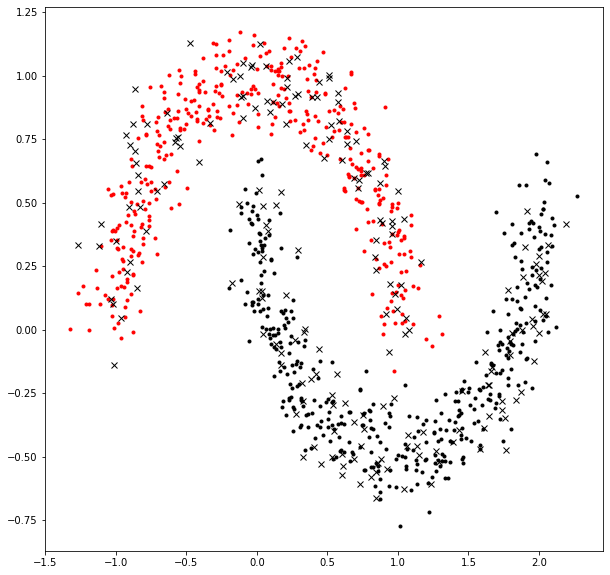

In [128]:
from matplotlib.pyplot import figure
import numpy as np
# create a new figure
fig = figure( figsize =(10,10))
# add a subplot to the figure
ax = fig.add_subplot(1,1,1)
# get indices of training data points for class 1 and class 0
train_one_indices = np.argwhere(y_train == 1)
train_zero_indices = np.argwhere(y_train == 0)
# plot the training data points for class 1 and class 0
ax.plot(x_train[train_one_indices, 0],x_train[train_one_indices,1],"k.")
ax.plot(x_train[train_zero_indices, 0],x_train[train_zero_indices,1],"r.")

# get indices of validation data points for class 1 and class 0
valid_one_indices = np.argwhere(y_valid == 1)
valid_zero_indices = np.argwhere(y_valid == 0)
# plot the validation data points for class 1 and class 0
ax.plot(x_valid[valid_one_indices,0] ,x_valid[valid_one_indices,1],"kx")
ax.plot(x_valid[valid_zero_indices,0] ,x_valid[valid_zero_indices,1],"kx")

The argwhere function returns the indices of the elements that satisfy the condition, which are then used to index into the training/validation data to get the data points corresponding to class 1 and class 0. The plot function is then used to plot the points with different markers for each class.

The np.argwhere() function returns the indices of elements in the input array that are non-zero or True. In this case, it returns the indices of the elements in the y_valid array that are equal to 1 and 0, respectively.

So valid_one_indices is a numpy array that contains the indices of all elements in y_valid that are equal to 1, and valid_zero_indices contains the indices of all elements that are equal to 0.

-----------------------------------

# Encode targets and move to pytorch

In [129]:
import torch
# Convert numpy arrays to PyTorch tensors
x_train , y_train = torch.tensor(x_train) , torch.tensor(y_train)
x_valid , y_valid = torch.tensor(x_valid) , torch.tensor(y_valid)
# Perform one-hot encoding on the labels
# For each 1, it returns [0,1], and for each 0, it returns [1,0]
y_train = torch.nn.functional.one_hot(y_train, num_classes = 2)
y_valid = torch.nn.functional.one_hot(y_valid, num_classes = 2)


This code block converts the training and validation data from NumPy arrays to PyTorch tensors using the torch.tensor() function.

Then, it applies one-hot encoding to the target labels of both training and validation sets using PyTorch's built-in function torch.nn.functional.one_hot().

One-hot encoding is a technique to represent categorical data in a numerical format, where each unique category is assigned a binary vector of 0s and 1s. In this case, there are two classes in the target labels (0 and 1), so each label is represented as a vector of size 2, where one element is 1 and the other is 0. For example, the label 0 is represented as [1, 0] and the label 1 is represented as [0, 1].

The num_classes parameter in the torch.nn.functional.one_hot() function specifies the number of classes in the data, which is 2 in this case.

# Forward Path

In [130]:
import torch
# set the seed for reproducibility
torch.manual_seed(5)
# initialize weight matrix with random values
w = torch.randn(size=(2,2))
# convert the dtype of w to float64
w = w.to(torch.float64)
# indicate that gradients should be computed for w
w.requires_grad=True
# retain the gradients for w
w.retain_grad()
# initialize bias matrix with random values
b = torch.randn(size=(1,2))
# convert the dtype of b to float64
b = b.to(torch.float64)
# indicate that gradients should be computed for b
b.requires_grad=True
# retain the gradients for b
b.retain_grad()


In [131]:
def predict(x):
   # Multiply the input tensor `x` by the transposed weight tensor `w`, then add the bias tensor `b`.
   # The result is an unnormalized score tensor `a`.
   # The @ symbol denotes matrix multiplication
   a = x.to(torch.float64) @ w.t() + b
   # Apply the softmax function along the second dimension of the score tensor `a` to get the predicted probabilities.
   # This results in a tensor of shape (batch_size, num_classes), where each row contains the predicted probabilities
   # of a single input instance belonging to each of the two classes.
   return torch.softmax(a,dim = 1)
   # dim=1 as we move ---> or in columns region which represents the number of classes

In [132]:
def loss_fn(x,y):
       y_hat = predict(x)
       return torch.mean(-(y*torch.log(y_hat)).sum(dim = 1))
    # calculate the cross-entropy loss
    # - y * log(y_hat) is element-wise multiplication and log is element-wise logarithm
    # sum(dim=1) sums across the second dimension (the probabilities for each class)
    # torch.mean() calculates the mean of the resulting vector

In [133]:
# For input x = [[1.,1.],[2.,2.]] and y = [[0,1],[1,0]]
# Compute the loss using the loss_fn() function
l = loss_fn(torch.tensor([[1.,1.],[2.,2.]]) ,y =torch.tensor([[0,1],[1,0]]))
print(l)

tensor(2.2928, dtype=torch.float64, grad_fn=<MeanBackward0>)


# Optimization Loop

In [134]:
EPOCHS = 1000
DELTA = 0.1
train_loss , valid_loss= [],[]
for _ in range(EPOCHS):
       # Compute the loss on the training set
       cur_train_loss = loss_fn(x_train,y_train)
       # Compute the gradients of the loss with respect to the learnable parameters
       cur_train_loss.backward()
       # memo the current training loss
       train_loss.append(cur_train_loss.data)
       # Compute the loss on the validation set, without computing gradients
       with torch.no_grad():
           cur_valid_loss = loss_fn(x_valid,y_valid)
           # Store the current validation loss
           valid_loss.append(cur_valid_loss.data)
           # Update the learnable parameters using the gradient descent algorithm
           w -= DELTA * w.grad.data
           b -= DELTA * b.grad.data
       # Zero out the gradients for the next iteration    
       w.grad.zero_() # the _  for inplace 
       b.grad.zero_()    

# Visualization

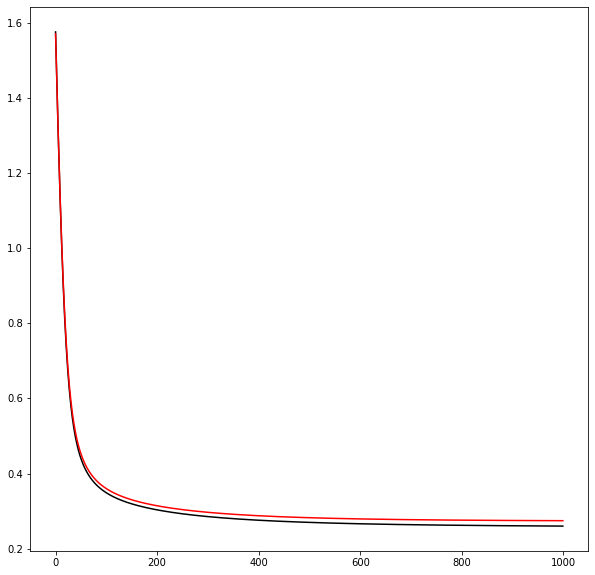

In [135]:
fig = figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.plot(train_loss,'k')
ax.plot(valid_loss,'r')

In [136]:
# We will visualize the decision boundary
# We will create a meshgrid of points and use our model to predict each function
# in this mesh, to check how our model will perform
# We start a block of code using with torch.no_grad() which disables gradient calculations
# to reduce memory usage and speed up computations when we don't need gradients.
with torch.no_grad():
  x_0 = torch.linspace(-3, 3, 100).repeat(1, 100).t()
  x_1 = torch.linspace(-3, 3, 100).repeat(100, 1).t().reshape(-1, 1)
  x = torch.hstack((x_0, x_1)).to(torch.double)
  # We create two one-dimensional tensors, x_0 and x_1, each containing 100 equally spaced values from -3 to 3.
  # Then, we use repeat() and t() to create 2-dimensional tensors from x_0 and x_1.
  # Finally, we use torch.hstack() to horizontally stack the two tensors into a single tensor x with shape (10000, 2).
  # The tensor x represents a grid of 10000 points on the 2D plane.

  # We convert the tensor x to a NumPy array x_plt for plotting.
  x_plt = x.numpy()
  # We pass the tensor x to the predict() function to get the predicted labels for each point on the mesh.
  # Then, we use torch.argmax() with dim=1 to get the index of the predicted class for each point.
  # The resulting tensor c_hat has shape (10000,) and contains either 0 or 1, 
  # indicating the predicted class for each point. We convert c_hat to a NumPy array c_hat_plt for plotting.
  y_hat = predict(x)
  c_hat = torch.argmax(y_hat, dim = 1)
  c_hat_plt = c_hat.numpy()
  # Overall, this block of code generates a meshgrid of points on the 2D plane 
  # and uses our model to predict the class of each point.

Here we are using torch.no_grad() to turn off gradient computation during this block of code. This is because we do not want to keep track of the gradients during the forward pass since we are only interested in the predictions and not the gradients.

We first create a meshgrid of 100x100 points between -3 and 3 using torch.linspace. We repeat the rows and columns of the first and second dimensions respectively using repeat to create 2D tensors x_0 and x_1.

Next, we reshape x_1 into a 1D tensor using reshape(-1, 1) and concatenate x_0 and x_1 along the second dimension using torch.hstack to obtain a 2D tensor x containing all the possible combinations of points in the meshgrid.

We convert x to a numpy array using .numpy() and use our predict function to obtain predictions for each point in the meshgrid. We use torch.argmax to get the class index with the highest probability for each point and convert it to a numpy array c_hat_plt.

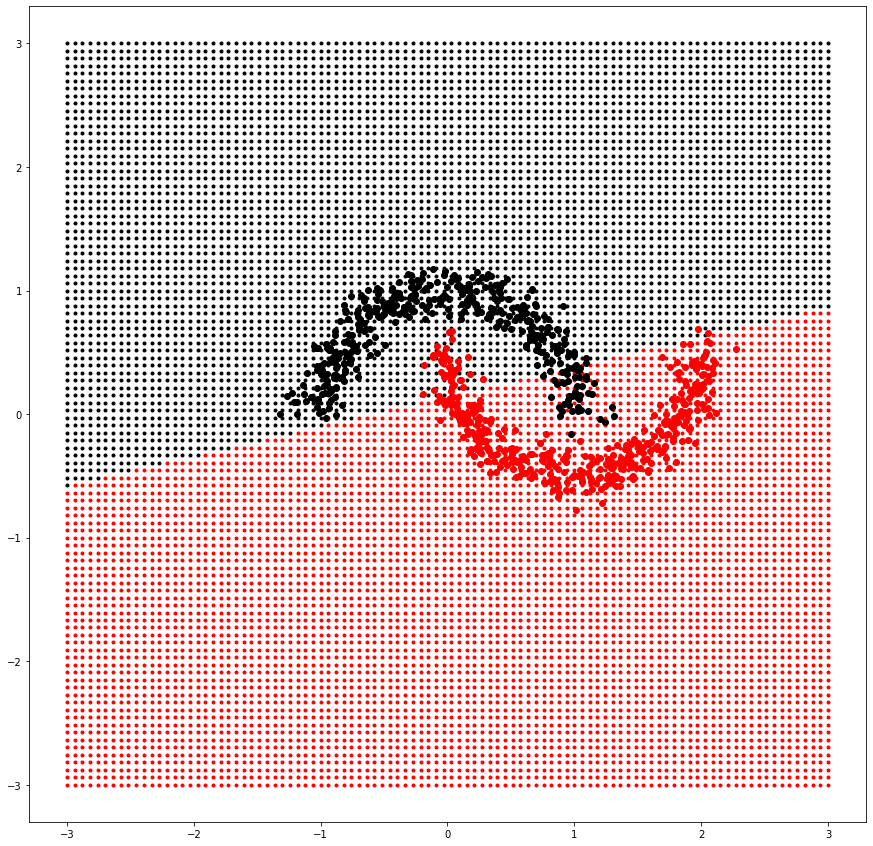

In [137]:
# Plotting
fig_prediction = figure(figsize = (15, 15))
ax_prediction = fig_prediction.add_subplot(1, 1, 1)
# plot the points predicted as class 0 as black dots
ax_prediction.plot(x_plt[np.argwhere(c_hat_plt == 0), 0], x_plt[np.argwhere(c_hat_plt == 0), 1], "k.")
# plot the points predicted as class 1 as red dots
ax_prediction.plot(x_plt[np.argwhere(c_hat_plt == 1), 0], x_plt[np.argwhere(c_hat_plt == 1), 1], "r.")
# plot the training points for class 0 as black circles
ax_prediction.plot(x_train[train_zero_indices, 0], x_train[train_zero_indices, 1], "ko")
# plot the training points for class 1 as red circles
ax_prediction.plot(x_train[train_one_indices, 0], x_train[train_one_indices, 1], "ro")
fig_prediction.show()

Here we create a new figure with figure(figsize = (15, 15)) and add a subplot using add_subplot(1, 1, 1).

We plot the points classified as 0 and 1 by our model on the subplot using plot with the color black ("k.") and red ("r.") respectively. We also plot the training points for class 0 and class 1 using the colors black ("ko") and red ("ro") respectively.

Finally, we show the plot using fig_prediction.show(). This plot helps us visualize the decision boundary of our model and how well it is able to separate the two classes.